# A code example: The long memory property of order flow

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
def binning(x,y,nbin=10,eq = True):
    step = (np.max(x)-np.min(x))/(nbin)
    X = []
    Y = []
    Yerr = []
    tmpY = []
    start = np.min(x)+step
    if eq:
        for i in range(len(x)):
            while x[i] > start:
                X.append(start-step/2)
                Y.append(np.mean(tmpY))
                #Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpY=[]
                pass
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(start-step/2)
            Y.append(np.mean(tmpY))
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X,Y,Yerr
        pass
    else:
        tmpX = []
        Xerr = []
        for i in range(len(x)):
            while x[i] > start:
                X.append(np.mean(tmpX))
                Y.append(np.mean(tmpY))
                Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
                Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
                start += step
                tmpX=[]
                tmpY=[]
                pass
            tmpX.append(x[i])
            tmpY.append(y[i])
            pass
        if len(tmpY)!=0:
            X.append(np.mean(tmpX))
            Y.append(np.mean(tmpY))
            Xerr.append(np.std(tmpX,ddof=1) /np.sqrt(len(tmpX)) )
            Yerr.append(np.std(tmpY,ddof=1) /np.sqrt(len(tmpY)) )
        return X, Y, Yerr

In [3]:
def PreProcessing(t,sign):
    T = np.zeros(len(t))
    Sign = np.zeros(len(t))
    prev = t[0]
    n = 0
    for i in range(len(t)):
        n += (prev != t[i])
        T[n] = t[i]
        Sign[n] = sign[i]
        prev = t[i]
        pass
    return T[:n+1],Sign[:n+1]

In [4]:
INTC_LOB   = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]=="k"])
TSLA_LOB   = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]=="k"])
INTC_order = np.sort(["../../Data/INTC/"+i for i in os.listdir("../../Data/INTC") if i[-8]!="k"])
TSLA_order = np.sort(["../../Data/TSLA/"+i for i in os.listdir("../../Data/TSLA") if i[-8]!="k"])

In [5]:
TSLASize = []
for i,z in zip(TSLA_order,TSLA_LOB):
    data = pd.read_csv(i,header=None)[[1,3]]
    data = data[data[1]==1][3].values
    TSLASize.extend(data.tolist().copy())
    pass
INTCSize = []
for i,z in zip(INTC_order,INTC_LOB):
    data = pd.read_csv(i,header=None)[[1,3]]
    data = data[data[1]==1][3].values
    INTCSize.extend(data.tolist().copy())
    pass


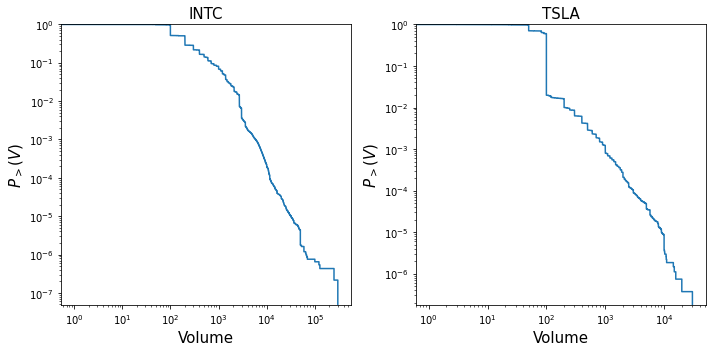

In [9]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5),tight_layout=True)

sns.ecdfplot(INTCSize,complementary=True,ax=ax1)

sns.ecdfplot(TSLASize,complementary=True,ax=ax2)
ax1.set_yscale("log")
ax1.set_xscale("log")
ax2.set_yscale("log")
ax2.set_xscale("log")

ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"Volume",fontsize=15)
ax1.set_ylabel(r"$P_>(V)$",fontsize=15)

ax2.set_title("TSLA",fontsize=15)
ax2.set_xlabel(r"Volume",fontsize=15)
ax2.set_ylabel(r"$P_>(V)$",fontsize=15)
plt.savefig("LO_size.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/LO_size.png")


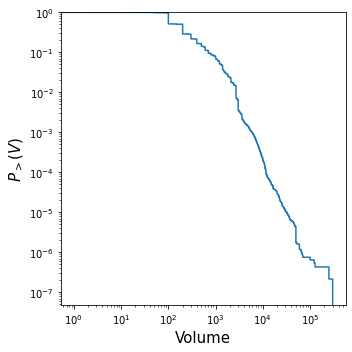

In [10]:
fig,(ax1) = plt.subplots(1,1,figsize=(5,5),tight_layout=True)

sns.ecdfplot(INTCSize,complementary=True,ax=ax1)

#sns.ecdfplot(TSLASize,complementary=True,ax=ax2)
ax1.set_yscale("log")
ax1.set_xscale("log")
#ax1.set_title("INTC",fontsize=15)
ax1.set_xlabel(r"Volume",fontsize=15)
ax1.set_ylabel(r"$P_>(V)$",fontsize=15)
#plt.savefig("LO_size.png")
plt.savefig("../../../docs/CodeExample/StylizedFacts/LO_size.png")